In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet18_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter,saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Before temperature - NLL: 1.348, ECE: 0.034
Optimal temperature: 0.987
After temperature - NLL: 1.347, ECE: 0.029


APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9191 ± 0.0019
Final Average Prediction Set Size: 15.36 ± 0.33
Final Average Coverage: 0.8991 ± 0.0030
Final Average Real Probability: 0.8128 ± 0.0036


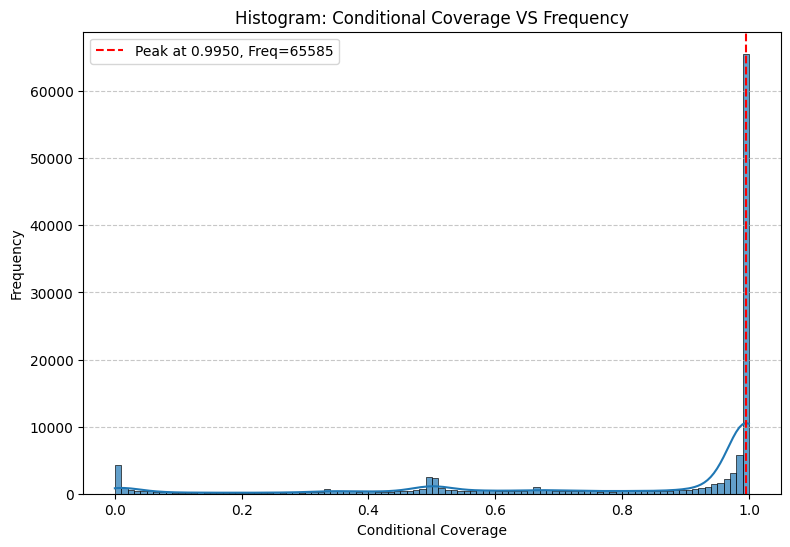

65585 (52.74%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9841 ± 0.0015
Final Average Prediction Set Size: 4.43 ± 0.04
Final Average Coverage: 0.8994 ± 0.0021
Final Average Real Probability: 0.7673 ± 0.0024


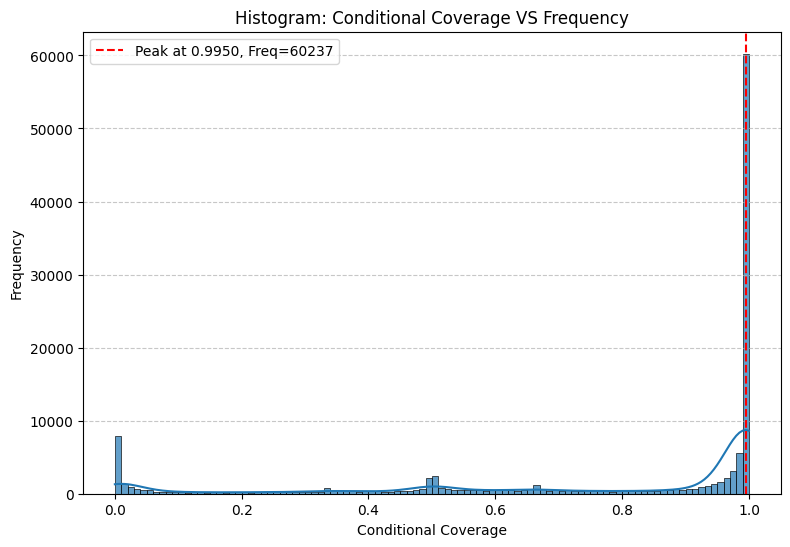

60237 (48.44%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.1, k_reg=6, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0273 ± 0.0050
Final Average Prediction Set Size: 4.18 ± 0.04
Final Average Coverage: 0.8997 ± 0.0018
Final Average Real Probability: 0.7627 ± 0.0025


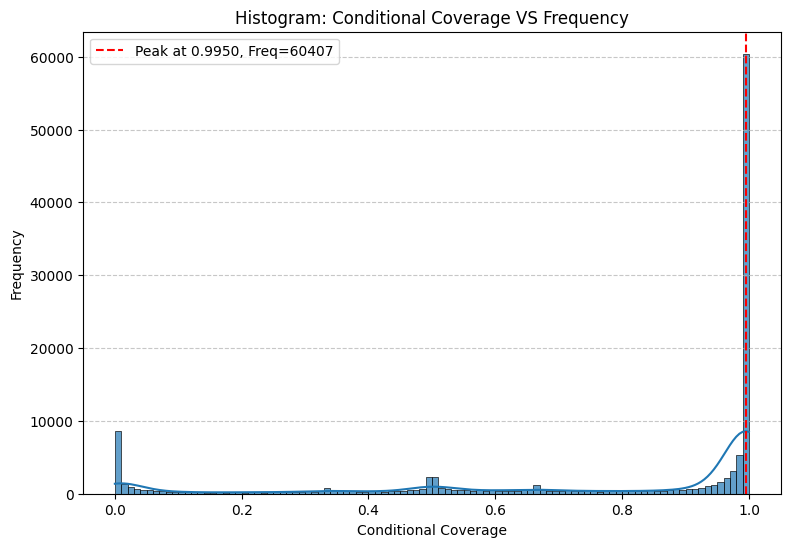

60407 (48.57%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9207 ± 0.0018
Final Average Prediction Set Size: 15.22 ± 0.29
Final Average Coverage: 0.8991 ± 0.0030
Final Average Real Probability: 0.8125 ± 0.0038


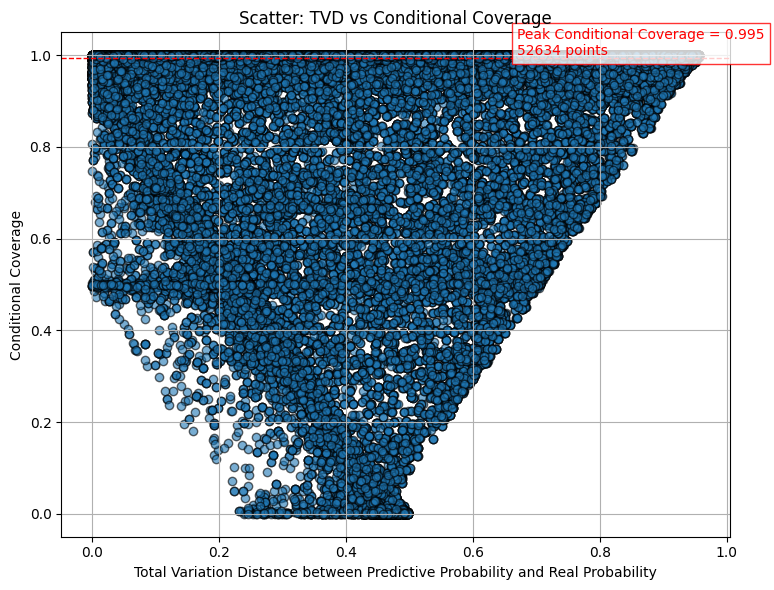

Peak Conditional Coverage = 0.995, with 52634 samples

=== Count Regions Summary ===
36408 (29.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
39176 (31.5%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
36697 (29.5%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.95608']
  Real Probability Set      : ['0.86886']
Sample 2:
  Predictive Probability Set: ['0.78777', '0.07211', '0.03777']
  Real Probability Set      : ['0.84928', '0.00055', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.89438', '0.04688']
  Real Probability Set      : ['0.91388', '0.07516']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.08691', '0.08215', '0.05807', '0.05548', '0.03286', '0.03155', '0.02766', '0.02750', '0.02288', '0.02213', '0.01802', '0.01702', '0.01602', '0.01545', '0.01508', '0.01480', '0.01453', '0.01367', '0.01245', '0.0113

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9852 ± 0.0015
Final Average Prediction Set Size: 4.44 ± 0.05
Final Average Coverage: 0.8993 ± 0.0020
Final Average Real Probability: 0.7676 ± 0.0030


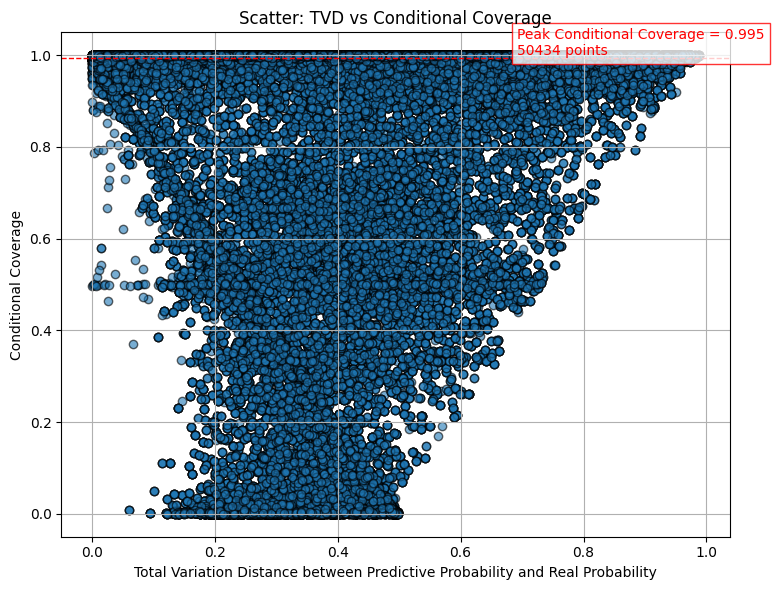

Peak Conditional Coverage = 0.995, with 50434 samples

=== Count Regions Summary ===
41420 (33.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
31842 (25.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
42783 (34.4%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.81367', '0.18628']
  Real Probability Set      : ['0.79303', '0.20505']
Sample 2:
  Predictive Probability Set: ['0.93255', '0.04046', '0.00913', '0.00759']
  Real Probability Set      : ['0.98764', '0.00000', '0.00618', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.51110', '0.48802']
  Real Probability Set      : ['0.50000', '0.50000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.21286', '0.18102', '0.13155', '0.11725', '0.05568', '0.03184', '0.03148', '0.02293']
  Real Probability Set      : ['0.00000', '0.00460', '0.00618', '0.00618', '0.01635'

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, k_reg=6, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0328 ± 0.0071
Final Average Prediction Set Size: 4.22 ± 0.07
Final Average Coverage: 0.8998 ± 0.0023
Final Average Real Probability: 0.7631 ± 0.0038


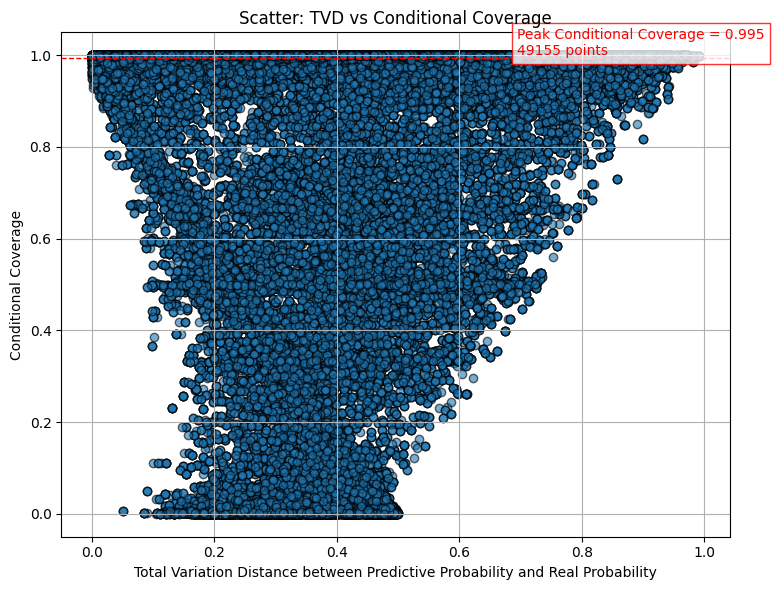

Peak Conditional Coverage = 0.995, with 49155 samples

=== Count Regions Summary ===
40368 (32.5%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
31205 (25.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
43169 (34.7%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.95910']
  Real Probability Set      : ['0.83216']
Sample 2:
  Predictive Probability Set: ['0.89297', '0.03585', '0.01239']
  Real Probability Set      : ['0.99069', '0.00049', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.87103', '0.06793']
  Real Probability Set      : ['0.97931', '0.00951']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.15851', '0.11120', '0.08219', '0.07622', '0.07333', '0.04625', '0.02570', '0.02181', '0.02162', '0.02048']
  Real Probability Set      : ['0.00000', '0.00748', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000'

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.1)